# **Police data analysis**
 

## **Questions for analysis**

## Demographic Analysis:

- What is the distribution of driver gender, driver age, and driver race in the dataset?
- Are there any significant differences in the demographics based on county or stop outcome?
- How does the age distribution vary across different races?


## Violation Analysis:

- What are the most common types of violations recorded in the dataset?
- Is there any correlation between driver age and the type of violation committed?
- Do certain races have a higher likelihood of specific types of violations?


## Search Analysis:

- What proportion of stops resulted in a search being conducted?
- Are there any patterns or biases in the types of searches conducted based on driver demographics or violation type?
- Is there any relationship between the presence of drugs-related stops and other variables in the dataset?


## Outcome Analysis:

- What are the most common stop outcomes recorded (e.g., warning, citation, arrest)?
- Are there any disparities in stop outcomes based on driver gender, race, or age?
- Is there any correlation between stop duration and the type of violation or search conducted?


## Imports

In [1]:
# Importing the required libraries for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading dataset

In [2]:
# Loading data into a pandas data frame

df = pd.read_csv('policeData.csv')
df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## Demographic analysis

In [3]:
df = df.drop(columns=['county_name'])

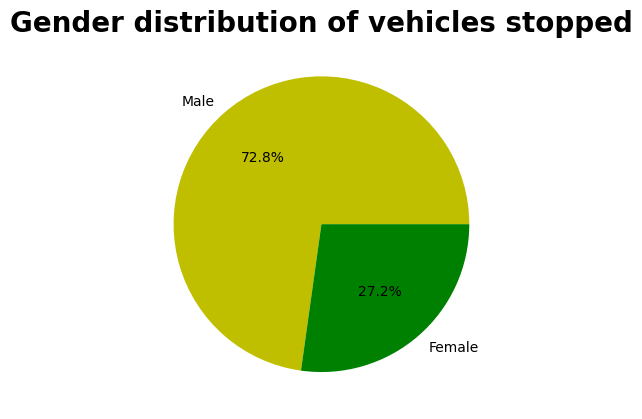

In [4]:
# Gender Distribution

female_drivers = df.groupby(['driver_gender'])['stop_date'].count()[0]
male_drivers = df.groupby(['driver_gender'])['stop_date'].count()[1]

plt.pie([male_drivers, female_drivers],
        labels=['Male', 'Female'],  
        colors='yg', 
        autopct='%1.1f%%')

plt.title('Gender distribution of vehicles stopped',
          fontdict={'fontsize':20},
          fontweight='bold')


plt.show()

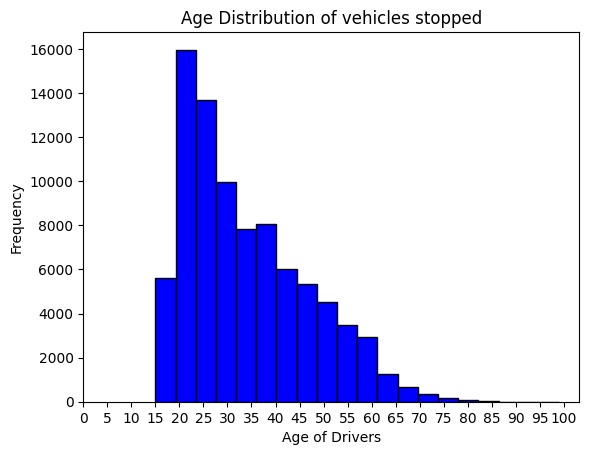

In [5]:
# Age Distribution

driver_age = df.driver_age.sort_values().dropna()
driver_age

plt.hist(driver_age,
         bins=20,
         color='blue',
         density=False,
         edgecolor='black'
         )

plt.xticks(np.arange(0,101,5))
plt.xlabel('Age of Drivers')
plt.ylabel('Frequency')
plt.title('Age Distribution of vehicles stopped')


plt.show()

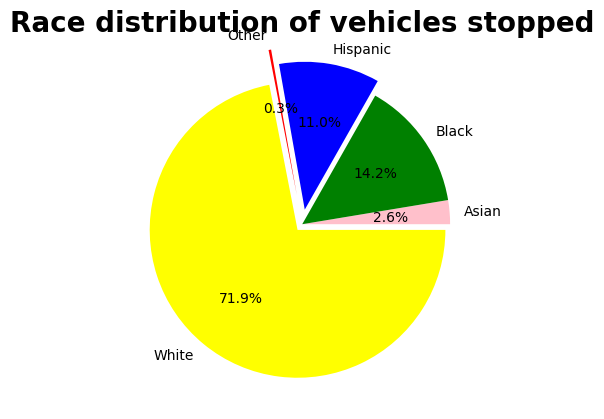

In [6]:
# Race Distribution

driver_race = dict(df.groupby('driver_race')['stop_date'].count().dropna())
race_name = driver_race.keys()
race_count = driver_race.values()
colors = ['pink', 'green', 'blue', 'red', 'yellow']

plt.pie(race_count,
        labels=race_name,
        colors=colors, 
        autopct='%1.1f%%',
        explode=[0,0,0.1,0.2,0.05]
        )

plt.title('Race distribution of vehicles stopped',
          fontdict={'fontsize':20},
          fontweight='bold')


plt.show()

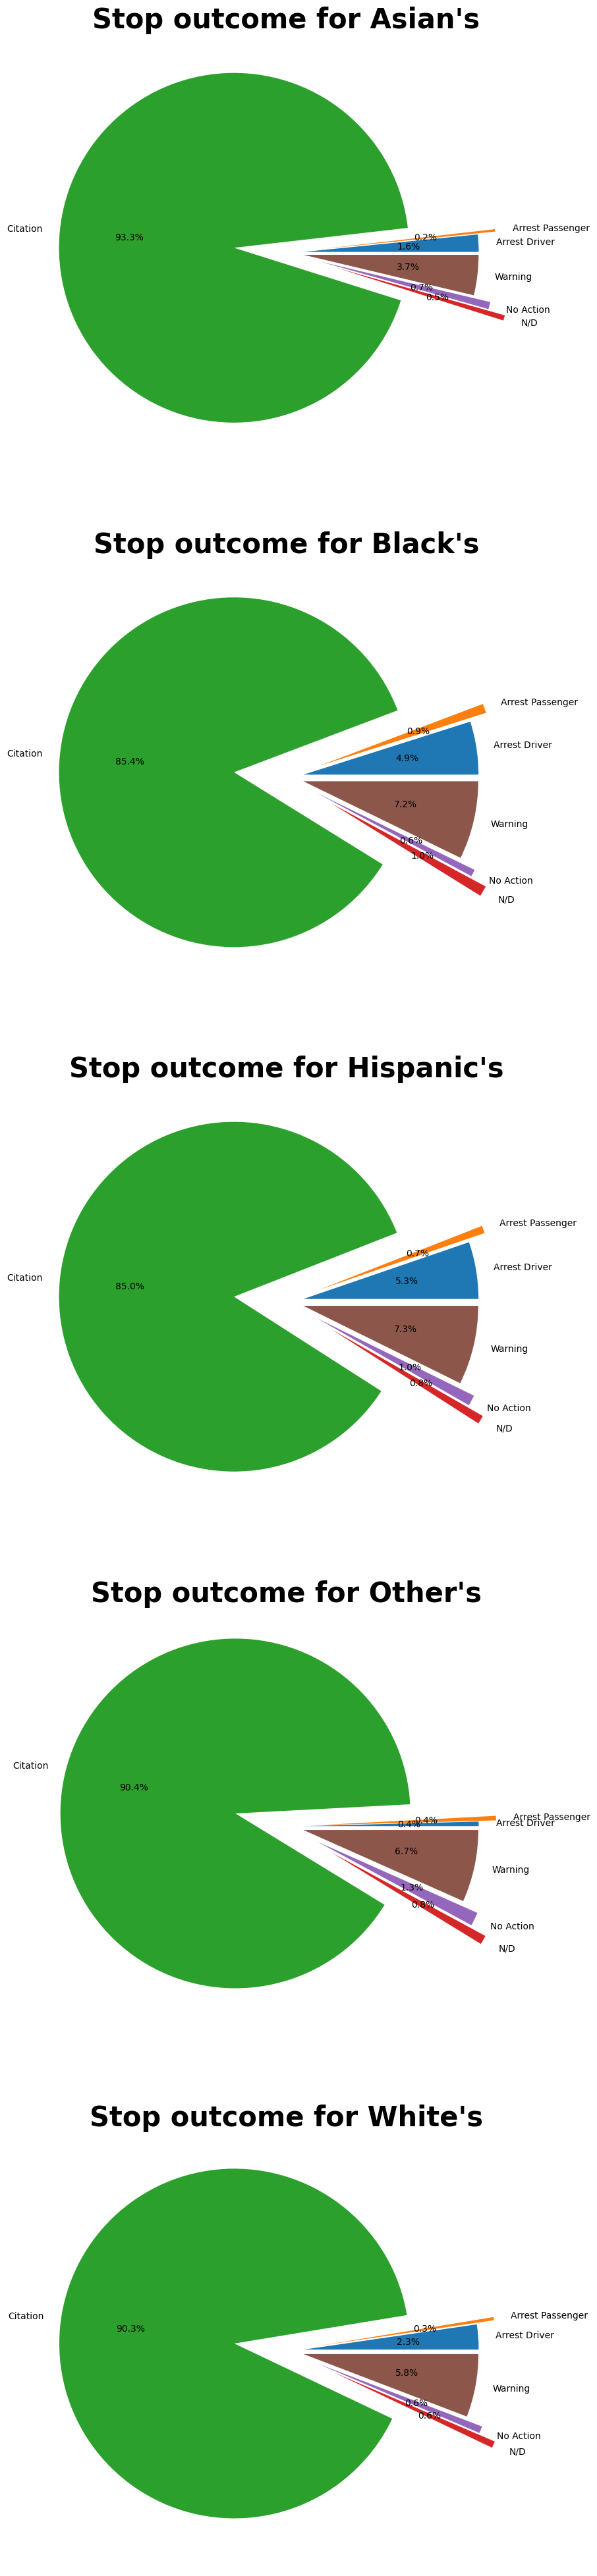

In [7]:
# Stop outcome for different races

newDF = df.groupby(['driver_race', 'stop_outcome'])['stop_date'].count().dropna().copy()
data_list = []
title_list = []

for i in range(0,5):
    race_outcome = dict(newDF[6*i:6*(i+1)])
    race = set()
    outcome = []
    outcome_number = []
    for key, val in race_outcome.items():
        race.add(key[0])
        outcome.append(key[1])
        outcome_number.append(val)
    

    data_list.append(outcome_number)
    labels_list = outcome
    title_list.append(list(race)[0])

    num_plots = len(data_list)
    

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 50))
axes = np.ravel(axes)

for i, ax in enumerate(axes):
    data = data_list[i]
    labels = labels_list
    
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=0, explode=[0.1,0.2,0.3,0.3,0.2,0.1])
    
    ax.set_title(f'Stop outcome for {title_list[i]}\'s', fontdict={'fontsize':30}, fontweight='bold')

plt.show()



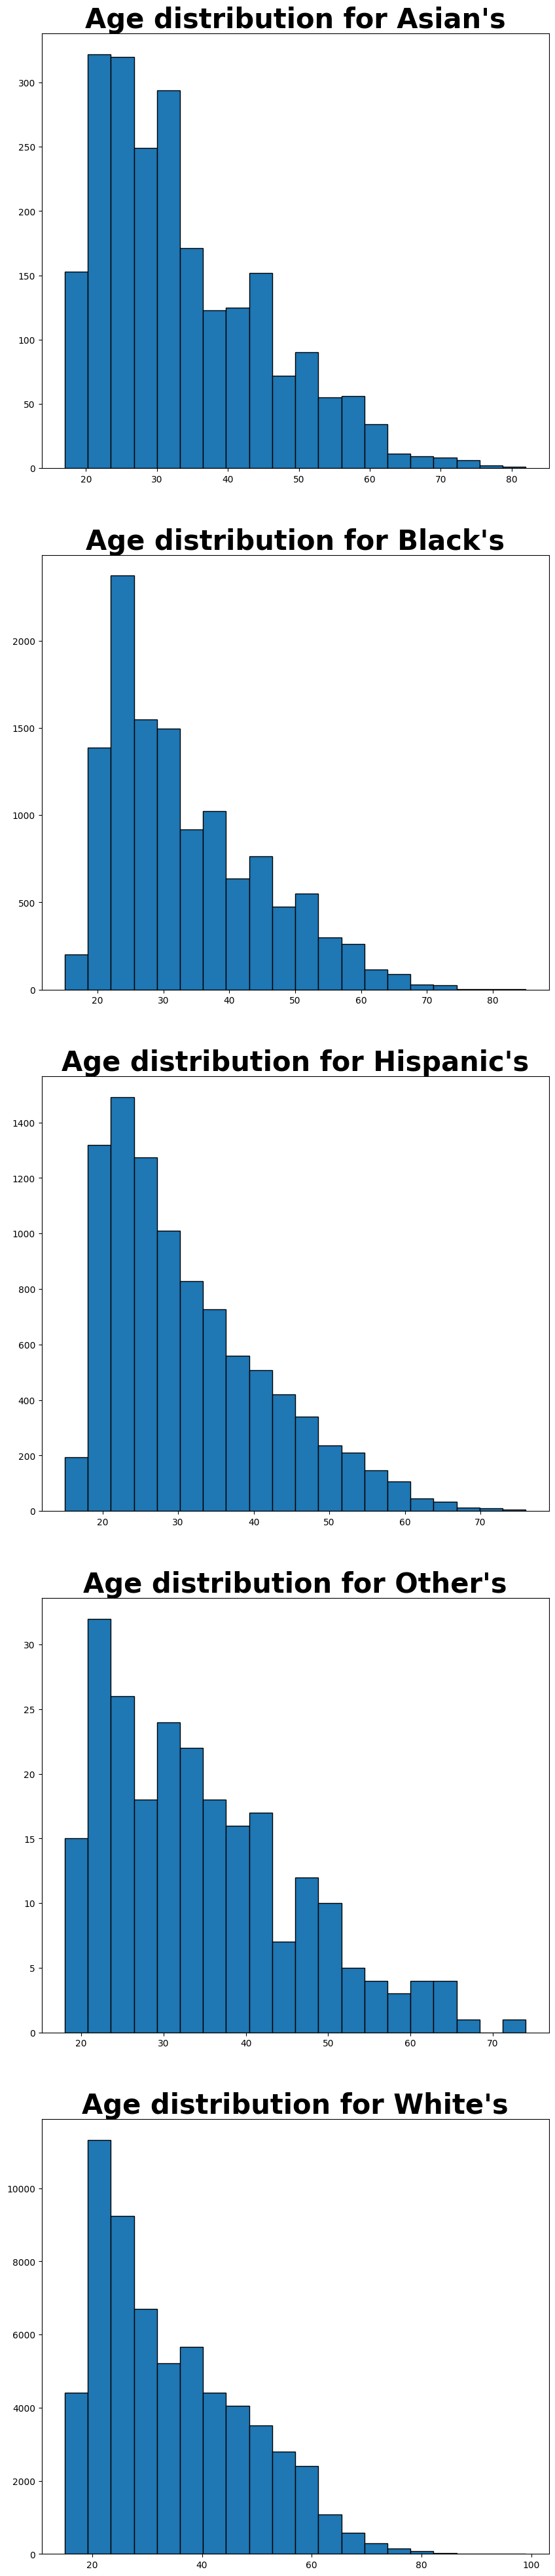

In [8]:
# Age distribution across different races

newDF2 = df.groupby(['driver_race'])['driver_age']
races = []
data_list = []

for name, grp in newDF2:
    age_list = list(grp)
    data_list.append(age_list)
    races.append(name)
    


fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 50))
axes = np.ravel(axes)

for i, ax in enumerate(axes):
    data = data_list[i]
    title = races[i]
    
    ax.hist(data, bins=20, edgecolor='black')
    ax.set_title(f'Age distribution for {title}\'s', fontdict={'fontsize':30}, fontweight='bold')
   

plt.show()


## Violation Analysis

In [9]:
# Common type of violations

violation_group = df.groupby(['violation_raw', 'violation'])['stop_date'].count().sort_values(ascending=False)

print('The most common type of violation:\n')
for vio_raw, vio in dict(violation_group[:3]):
    print(f'{vio_raw} ({vio})')

The most common type of violation:

Speeding (Speeding)
Other Traffic Violation (Moving violation)
Equipment/Inspection Violation (Equipment)


In [10]:
# Correlation between driver_age and type of violation commited

corr_grp = df.groupby(['driver_age'])['stop_date'].count()
list1 = []
list2 = []


for key, val in dict(corr_grp).items():
    list1.append(key)
    list2.append(val)



newDF3 = pd.DataFrame({'Age': list1, 'Vio': list2})

# Calculate the correlation between the two lists
correlation = newDF3['Age'].corr(newDF3['Vio'])

# Display the correlation
print(f'Correlation between driver\'s age and violation is: {correlation}')


Correlation between driver's age and violation is: -0.8013735666169437


In [11]:
# Violations most likely by a certain race

vio_grp = df.groupby(['driver_race', 'violation'])['stop_date'].count()
vio_count = []
race_vio_count = {}


for i in range(0,5):
    race_outcome = dict(newDF[6*i:6*(i+1)])
    
    
    sorted_dict = dict(sorted(race_outcome.items(), key=lambda x: x[1]))

    print(list(sorted_dict.keys())[-3])
    print(list(sorted_dict.values())[-3])

('Asian', 'Arrest Driver')
36
('Black', 'Arrest Driver')
600
('Hispanic', 'Arrest Driver')
500
('Other', 'No Action')
3
('White', 'Arrest Driver')
1434


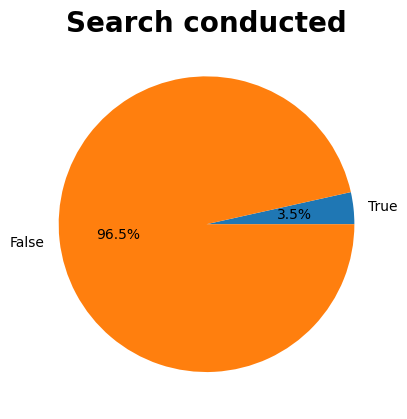

In [12]:
# Percentage of stops resulting in vehicle search

search_not_conducted = len(df[df.search_conducted == False])
search_conducted = len(df[df.search_conducted == True])

plt.pie([search_conducted, search_not_conducted], autopct='%1.1f%%', labels=['True', 'False'])
plt.title('Search conducted', fontdict={'fontsize':20}, fontweight='bold')



plt.show()

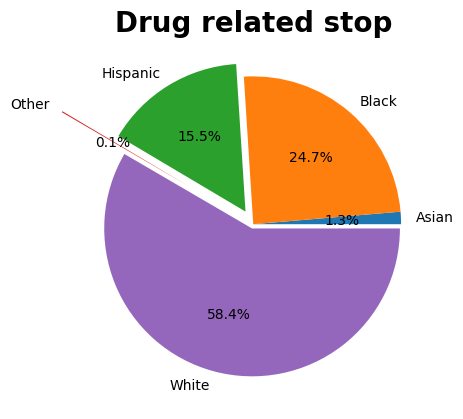

In [13]:
# Drug related stop

drugDF = df[df.drugs_related_stop == True]
drug_grp = drugDF.groupby(['driver_race'])['stop_date'].count()

drug_race = dict(drug_grp).keys()
drug_count = dict(drug_grp).values()

plt.pie(drug_count, labels= drug_race, autopct='%1.1f%%', explode=[0,0,0.1,0.5,0.03])
plt.title('Drug related stop', fontdict={'fontsize':20}, fontweight='bold')

plt.show()